<img src='./logo.png'><br>
ref: https://www.kaggle.com/mlg-ulb/creditcardfraud

* 주성분분석으로 나온 데이터이다.
* 고차원 데이터 -> 저차원 데이터로
* 주성분: 공분산 행렬의 고유벡터 ->직교함

In [103]:
# $$$$
# 추가부분

In [3]:
# 분석
import pandas as pd
import numpy as np

# 경고
import warnings
warnings.filterwarnings(action='ignore')

# 날짜 가공
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# 데이터 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15
# plt.figure(figsize=(12,4)) # plot 12:4 비율

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

In [4]:
# 사이킷런
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score

In [5]:
# 사이킷런 점수
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
						 # ---> y_true, y_pred
from sklearn.metrics import precision_recall_curve # y_true, probas_pred
from sklearn.metrics import roc_auc_score, roc_curve # y_true, y_score

# 사이킷런 스케일러
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 사이킷런 학습 데이터 증강
# StratifiedFold는 회귀에서는 X
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

# Data load & pre-setting

## Data load

In [7]:
train=pd.read_csv('./dataset/creditcard.csv')

In [8]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
train.shape

(284807, 31)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Pre-Setting

### lower

In [22]:
train.columns=[col.lower() for col in train.columns]
train.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

# EDA

## target feature : imbalancing

In [46]:
# 전체 비율
train['class'].value_counts()/(train.shape[0])*100

0    99.827251
1     0.172749
Name: class, dtype: float64

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


<AxesSubplot:>

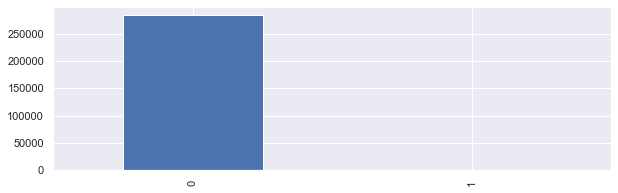

In [47]:
# 시각화
print(train['class'].head())
train['class'].value_counts().sort_index().plot(kind='bar')

### 결론: imbalancing 하다

## unique 값 확인

In [49]:
train.nunique()

time      124592
v1        275663
v2        275663
v3        275663
v4        275663
v5        275663
v6        275663
v7        275663
v8        275663
v9        275663
v10       275663
v11       275663
v12       275663
v13       275663
v14       275663
v15       275663
v16       275663
v17       275663
v18       275663
v19       275663
v20       275663
v21       275663
v22       275663
v23       275663
v24       275663
v25       275663
v26       275663
v27       275663
v28       275663
amount     32767
class          2
dtype: int64

### 결과
<pre>
<font size=3>
:: **target feature**: ""class""  
:: **class** :         2  
:: **amount** :        32767  
:: **time** :          124592  
</font>

## 상관계수 분석
:: null 없고 모두 float이라 바로 진행

### abs로 절댓값 큰 것 확인

<AxesSubplot:>

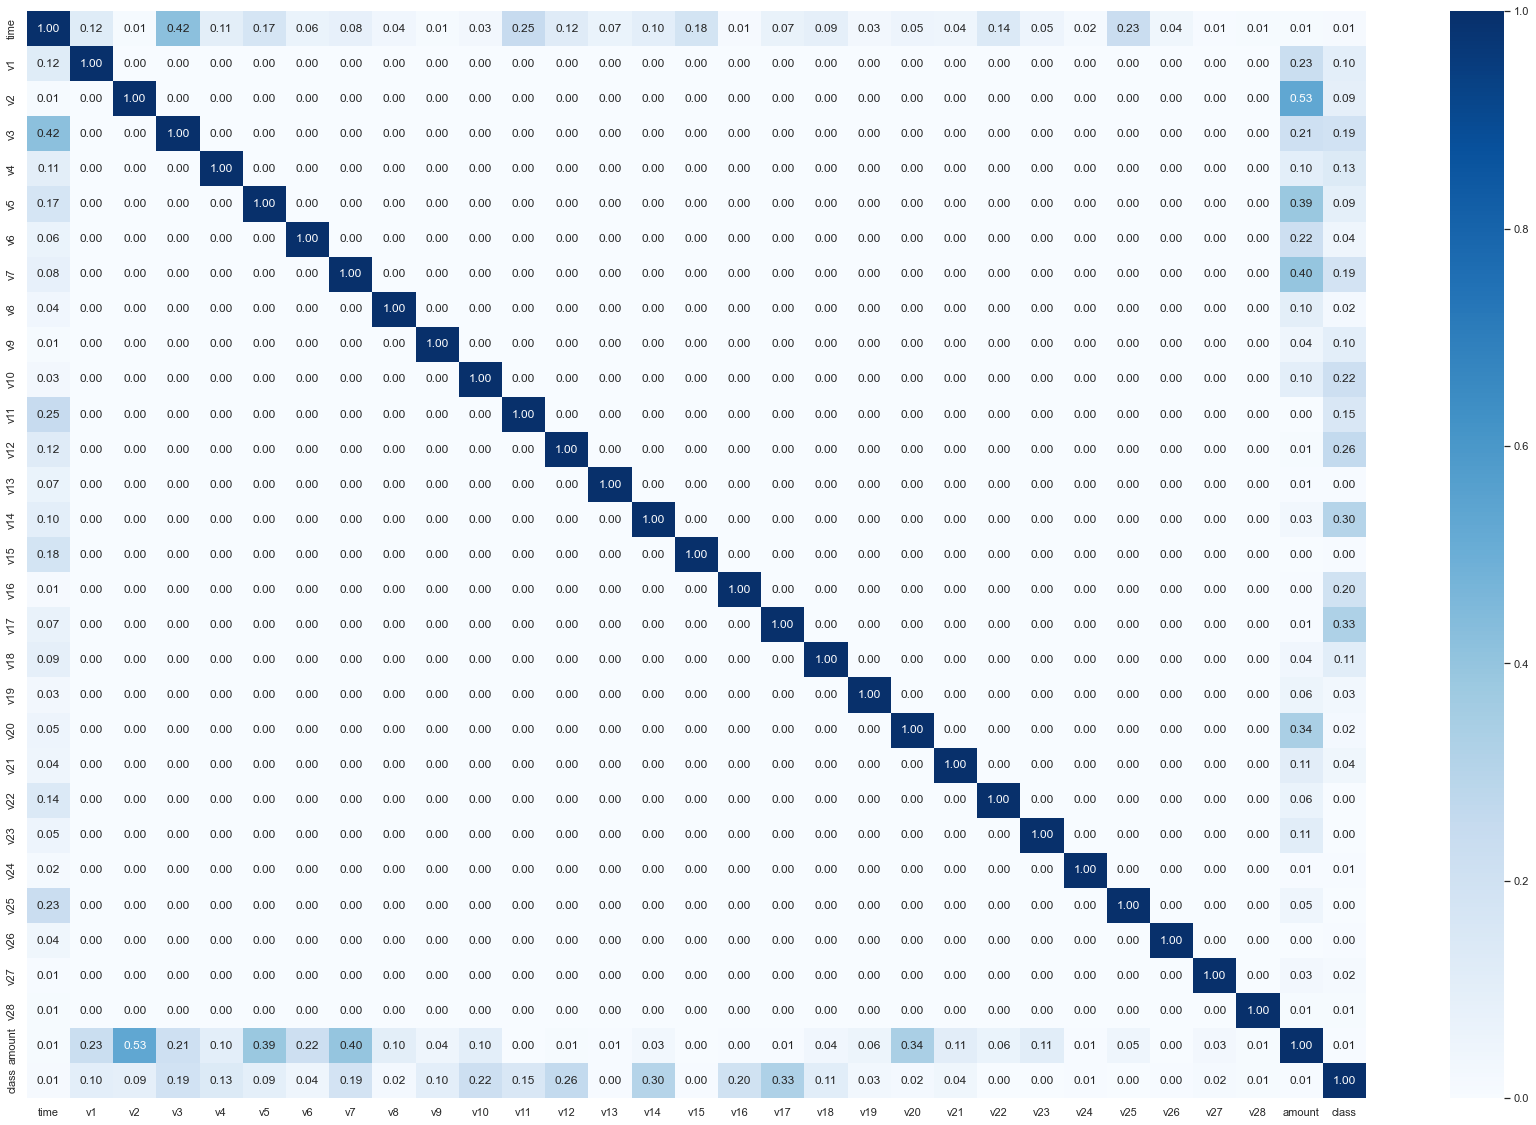

In [64]:
# sns.heatmap(crd.corr(), cmap='Blues' , annot=True, fmt=".2f")
sns.set(rc={'figure.figsize':(30, 20)})
sns.heatmap(abs(train.corr()), cmap='Blues' , annot=True, fmt=".2f")

#### 결론
<pre>
    절대값 기준
    amount와 v2 : 0.53
    amount와 v5 : 0.39
    amount와 v7 : 0.40
    amount와 v20 : 0.34
    time과 v3 : 0.42

### 양수 음수 관계 확인

<AxesSubplot:>

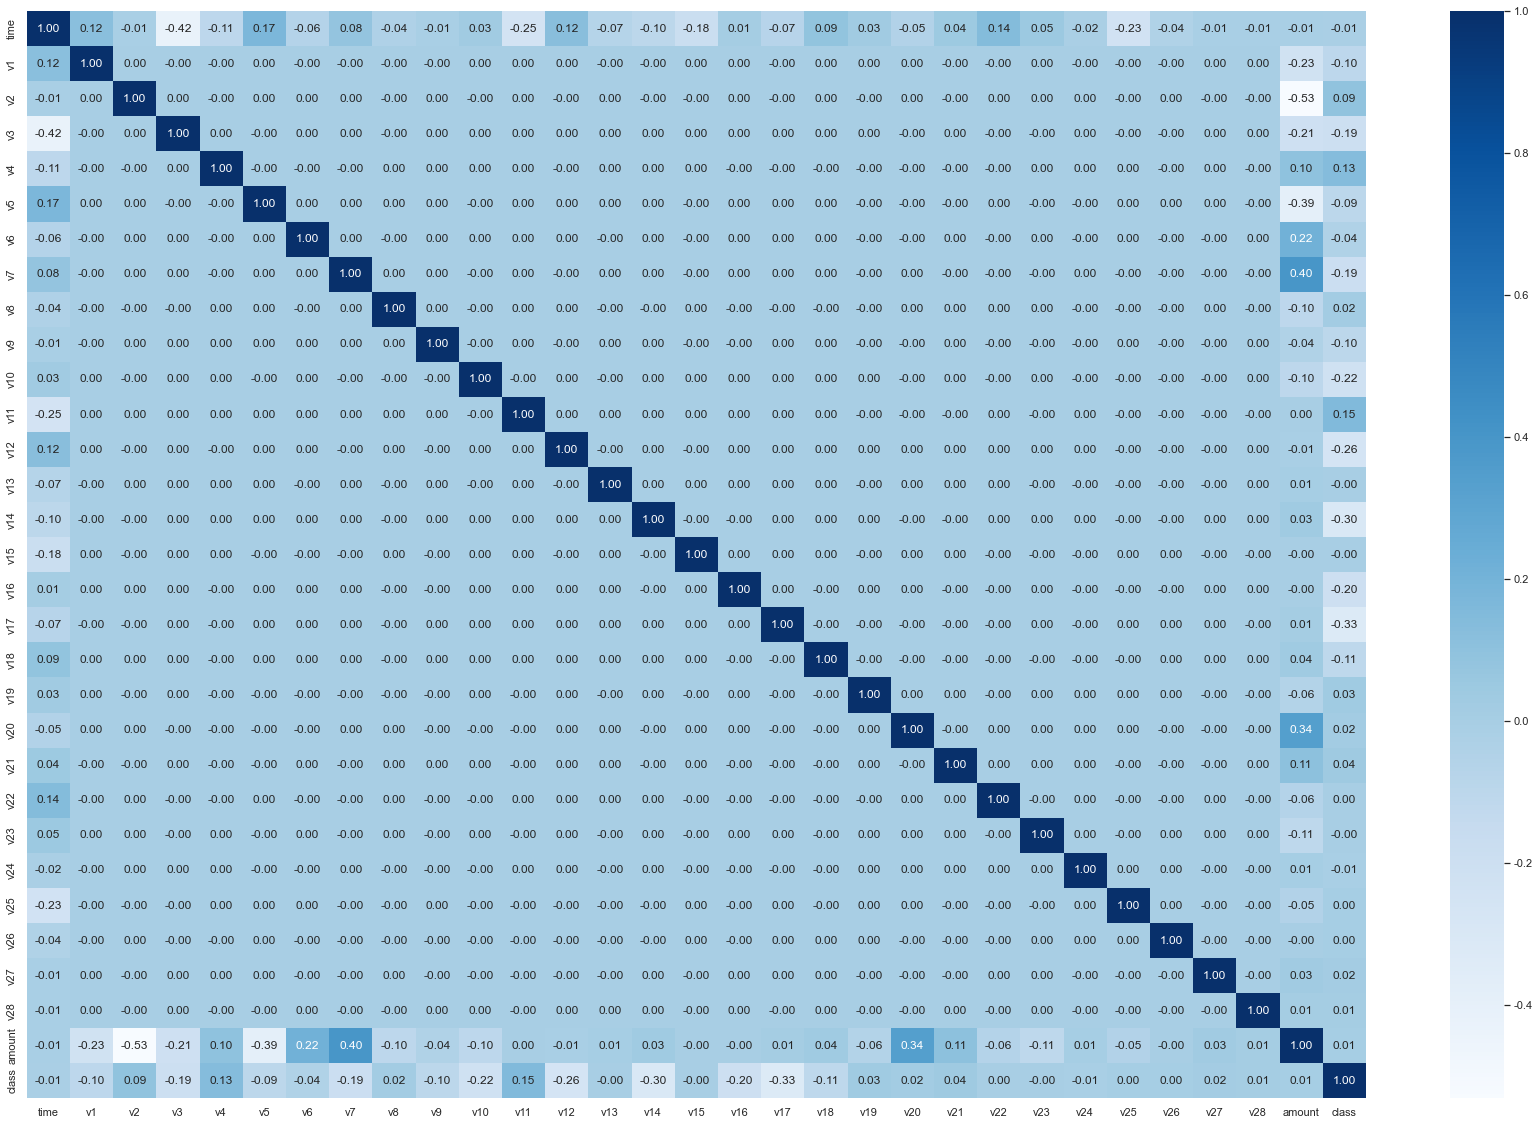

In [63]:
sns.set(rc={'figure.figsize':(30, 20)})
sns.heatmap(train.corr(), cmap='Blues' , annot=True, fmt=".2f")

### 상삼각행렬로 뽑아오기(코드 참고)
찾아보면 빨강 파랑으로도 할 수 있다.

In [ ]:
# $$$$
# np.triu 부분
# 탑 5, low 5 가져와도 가능

#### 결론
<pre>
    상관계수
    amount와 v2 : -0.53
    amount와 v5 : -0.39
    amount와 v7 : 0.40
    amount와 v20 : 0.34
    time과 v3 : -0.42

## 변수 distribution 분석

c:\ai\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
c:\ai\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
c:\ai\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
c:\ai\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
c:\ai\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is 

KeyboardInterrupt: 

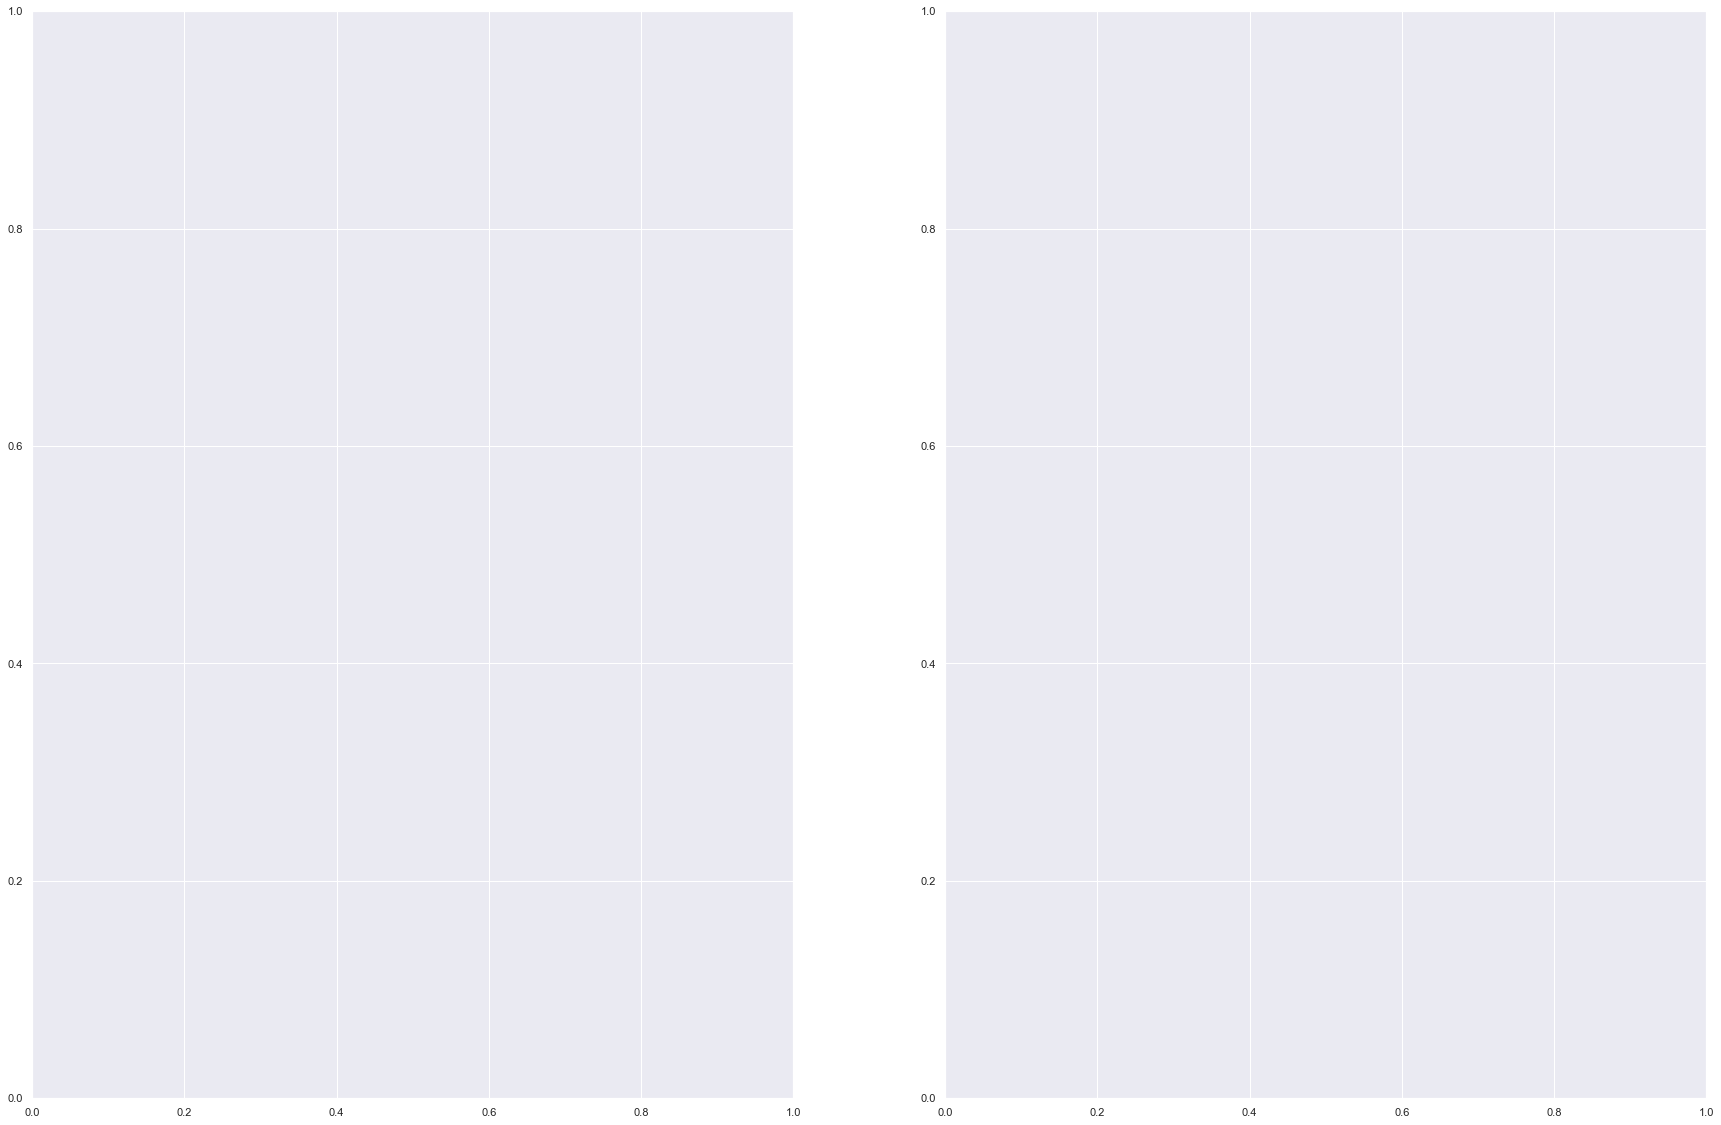

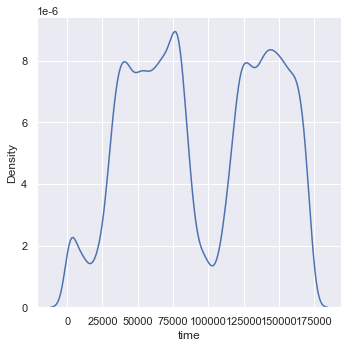

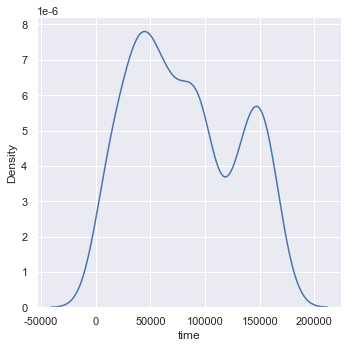

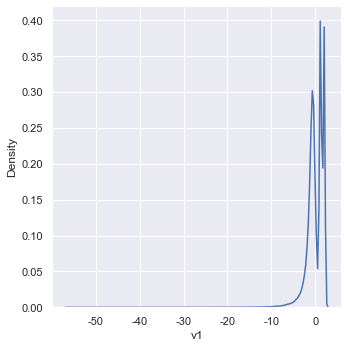

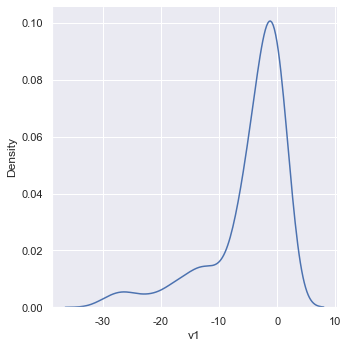

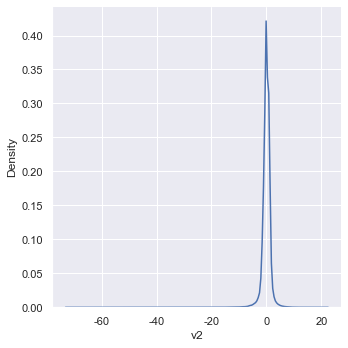

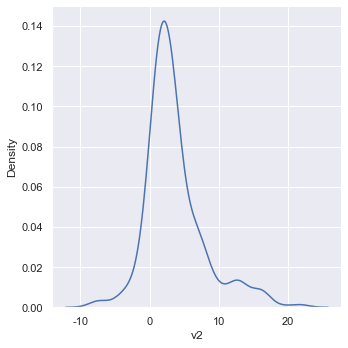

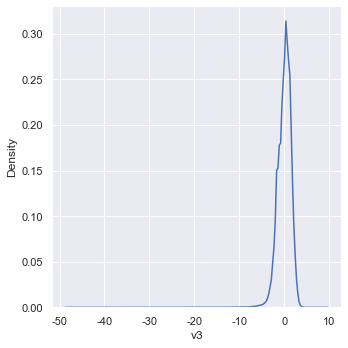

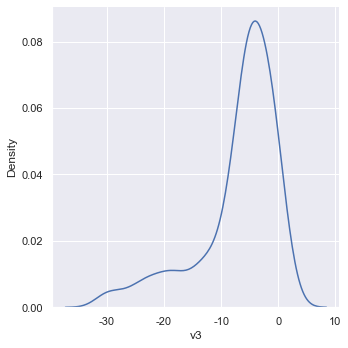

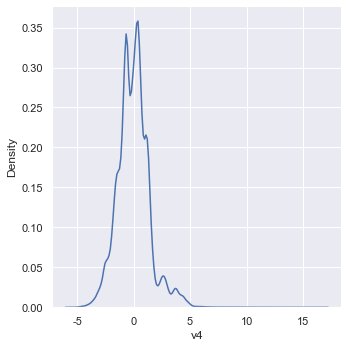

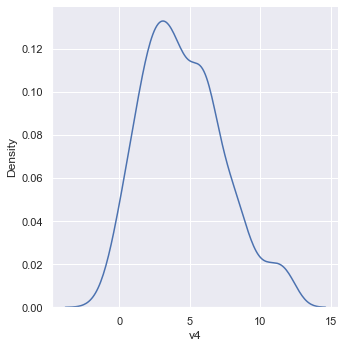

Error in callback <function flush_figures at 0x0000022C90D795E0> (for post_execute):


KeyboardInterrupt: 

In [78]:
for col in train.columns:
    sns.displot(train, x=col, kind="kde")
    sns.displot(train[train['class']==1], x=col, kind="kde")

In [66]:
train[train['class']==1].head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [104]:
# $$$$
train.describe()

# amount: 이상치 겁나 크다(왜도) -> 스케일링 해야 좋을듯??

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Figure size 1152x720 with 0 Axes>

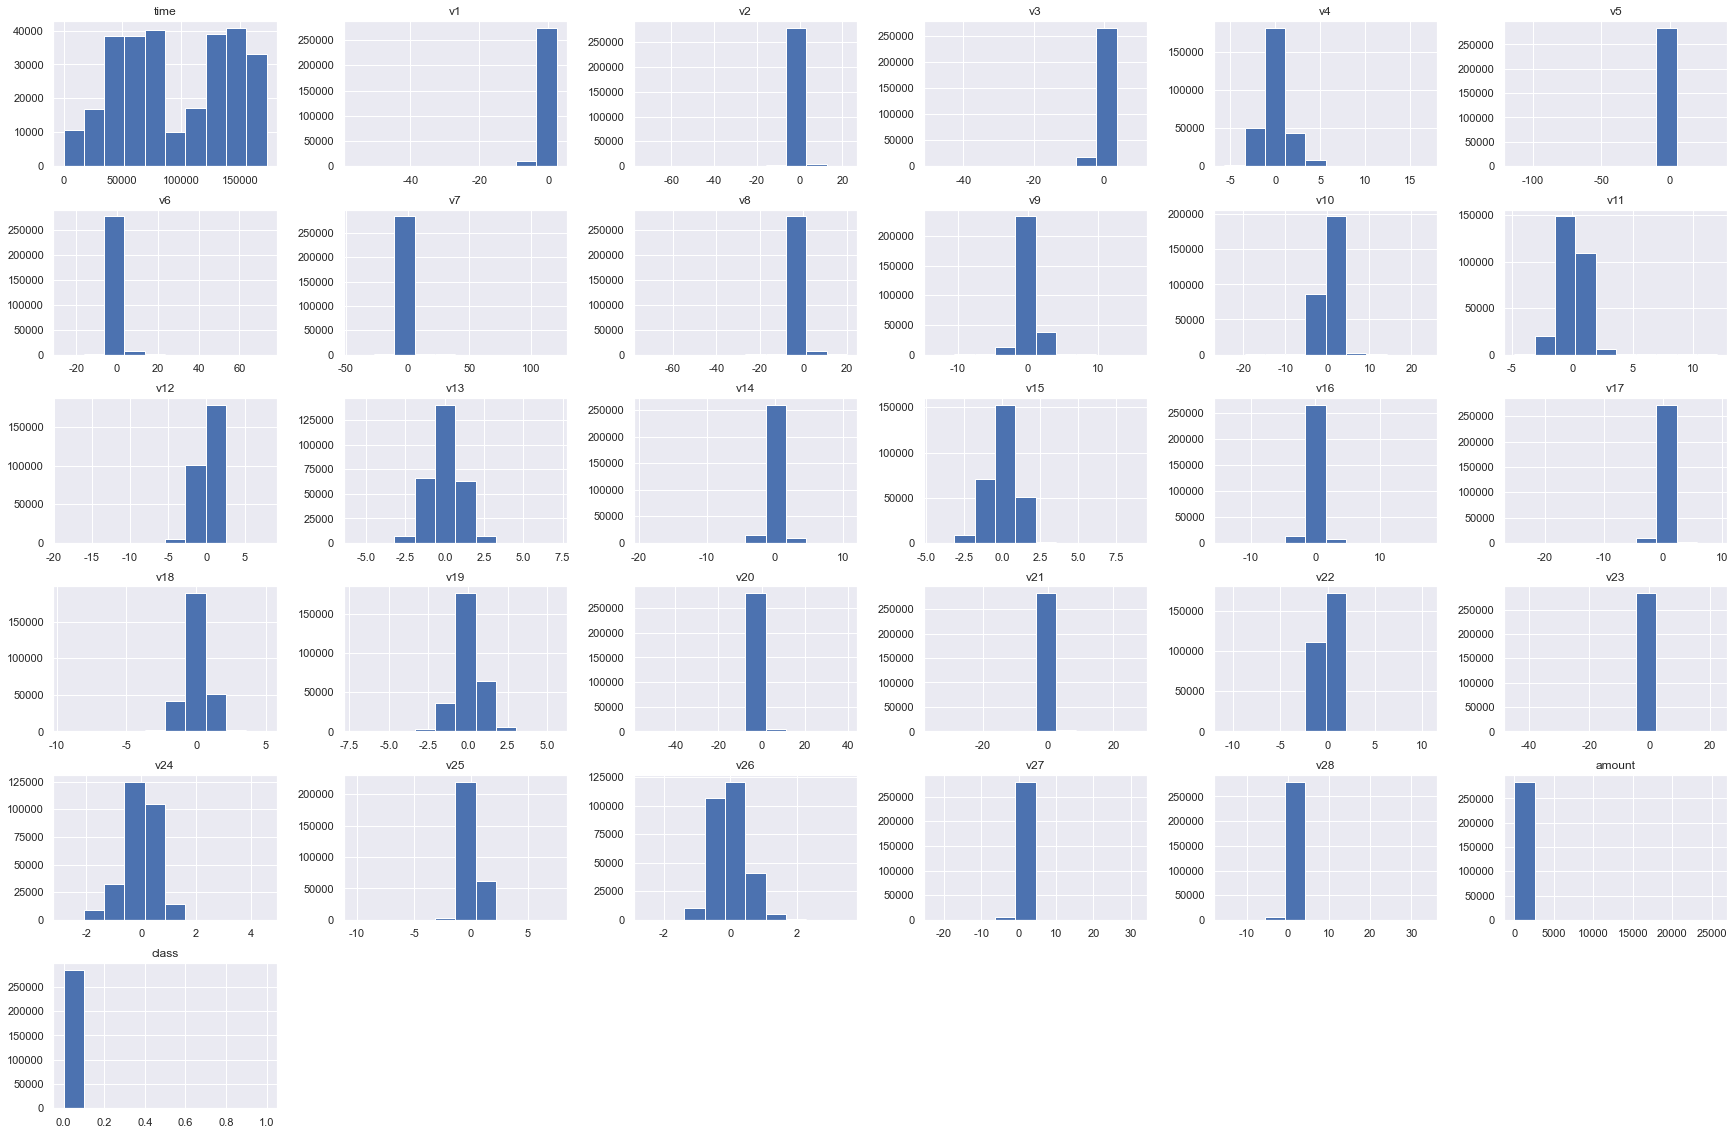

In [107]:
# $$$$ seaborn이나 matplot은 겁나 오래 걸리니까 df자체 기능 사용 추천
plt.figure(figsize=(16,10))
train.hist()
plt.show()

# time: 뭔가 쌍봉 느낌의 분포 -> 뭔가 결제 시간이 중앙에 몰린 느낌

# 1차 검정

## 함수

In [140]:
# target이 multi일 경우
# Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

def my_score(y_true, y_pred):
    # report=classification_report(y_true, y_pred)
    # accuracy=accuracy_score(y_true, y_pred)
    
    cur_report=confusion_matrix(y_test,pred)
    print(cur_report)
    accuracy=accuracy_score(y_true, y_pred)
    
    precision=precision_score(y_true, y_pred,    average='binary') # 보통 macro로 써서 macro로 수정
    recall=recall_score(y_true, y_pred,          average='binary')
    f1=f1_score(y_true, y_pred,                  average='binary')
    # print('--'*30)
    # print("<REPORT>")
    # print(report, '\n')
    print('--'*30)
    print("<DETAIL>")
    print(f"\t accuracy:\t{accuracy:.4f} \n \t precision:\t{precision:.4f} \n \t recall:\t{recall:.4f} \n \t f1:\t\t{f1:.4f}\n")
    

        
def my_curv(y_test, proba_1):
    precision, recall, th = precision_recall_curve(y_test, proba_1) # proba 양일 때만 온다.
    plt.plot(th, precision[:len(th)], label="precision")
    plt.plot(th, recall[:len(th)], label="recall")
    plt.xlabel(th)
    plt.ylabel(score)
    plt.legend()
    plt.show()
    
    fpr, tpr, th=roc_curve(y_test, proba)
    plt.title(f"AUC Score : {roc_auc_score(y_test, proba):.4f}")
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],linestyle="--")
    plt.xlabel("FPR")
    plt.xlabel("TPR")
    plt.show()
    
    
# binary_mode: curve곡선은 binary_mode일 때만 고르겠다.
def my_fit_score(train, target="class", binary_mode=False):
    model_list = [RandomForestClassifier(n_estimators=30, random_state=1234) , # n_estimators는 너무 느려서 일단 30으로 줄이겠다.
              LogisticRegression(penalty="l2", random_state=1234),
              # KNeighborsClassifier(),
              #DecisionTreeClassifier(),
              #LinearSVC()ㄴ
             ]
    
    y = train[target]
    X = train.drop([target], axis=1)

    X_train,X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=1234,
                                                   shuffle=True
                                                   )
   
    for model in model_list:
        model.fit(X_train, y_train)  #---학습해라
        pred = model.predict(X_test)
        # acc_score = accuracy_score(y_test, pred)
        print('=='*30)
        print(f"\t\t<<{model.__class__.__name__}>>")
        my_score(y_test, pred)
        
        #  print(model.feature_importances_) # 어레이로 출력됨. => 모델이 어떤 변수를 중요하게 봤나
        # -------------------------피쳐 중요도
        # plt.rc('font', family='Malgun Gothic')
        # plt.xticks(rotation=90) # 90도로 돌림
        # plt.bar(X.columns, model.feature_importances_)
        
        if binary_mode == True:
            proba=model.predict_proba(X_test)
            my_curv(y_test, proba[:, 1])
        
    print('=='*30)

#

## 함수 실행

In [52]:
my_fit_score(train, target='class')

		<<RandomForestClassifier>>
------------------------------------------------------------
<REPORT>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.72      0.82        98

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962
 

------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9995 
 	 precision:	0.9467 
 	 recall:	0.7245 
 	 f1:		0.8208



c:\ai\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


		<<LogisticRegression>>
------------------------------------------------------------
<REPORT>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.64      0.65        98

    accuracy                           1.00     56962
   macro avg       0.82      0.82      0.82     56962
weighted avg       1.00      1.00      1.00     56962
 

------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9988 
 	 precision:	0.6495 
 	 recall:	0.6429 
 	 f1:		0.6462

		<<KNeighborsClassifier>>
------------------------------------------------------------
<REPORT>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962
 

---

## 1차 점수

<pre>
============================================================
		<`RandomForestClassifier>
------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9995 
 	 precision:	0.9467 
 	 recall:	0.7245 
 	 f1:		0.8208
        
============================================================
		<`LogisticRegression>
------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9988 
 	 precision:	0.6495 
 	 recall:	0.6429 
 	 f1:		0.6462

============================================================
		<`KNeighborsClassifier>
------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9984 
 	 precision:	1.0000 
 	 recall:	0.0510 
 	 f1:		0.0971

============================================================

### 결론  
<pre>
초기 params 설정:  
RandomForestClassifier(n_estimators=30, random_state=1234)  
-> (n_estimators는 너무 느려서 일단 30)  
LogisticRegression(penalty="l2", random_state=1234)  

acuuracy 점수 제외(imbalancing해서 나머지 의미 x)  
KNeighborsClassifier 모델 제외(튜닝할 거라 해도 점수 너무 낮음, 그리고 오래 걸림)  

# 변수 조정  
<pre>
 상관계수
    amount와 v2 : -0.53
    amount와 v5 : -0.39
    amount와 v7 : 0.40
    amount와 v20 : 0.34
    time과 v3 : -0.42
-> v2 삭제

In [86]:
train2=train.drop(['v2'], axis=1)

In [87]:
my_fit_score(train2, target='class')

		<<RandomForestClassifier>>
------------------------------------------------------------
<REPORT>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.72      0.81        98

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962
 

------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9994 
 	 precision:	0.9103 
 	 recall:	0.7245 
 	 f1:		0.8068



c:\ai\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


		<<LogisticRegression>>
------------------------------------------------------------
<REPORT>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.60      0.65        98

    accuracy                           1.00     56962
   macro avg       0.86      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962
 

------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9989 
 	 precision:	0.7108 
 	 recall:	0.6020 
 	 f1:		0.6519

		<<KNeighborsClassifier>>
------------------------------------------------------------
<REPORT>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962
 

---

## 2차 점수
<pre>
============================================================
		RandomForestClassifier
------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9994 
 	 precision:	0.9103 
 	 recall:	0.7245 
 	 f1:		0.8068
============================================================
		KNeighborsClassifier
------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9984 
 	 precision:	1.0000 
 	 recall:	0.0510 
 	 f1:		0.0971

============================================================

### 결론: drop 안 한다

# 튜닝

In [90]:
y = train['class']
X = train.drop(['class'], axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=1234,
                                                   shuffle=True
                                                      )

model = RandomForestClassifier(n_estimators=100, random_state=1234)
#-- 튜닝 : 하이퍼파라미터 값을 임의로 변경해서 모델의 성능을 좋게 한다.
myparam = {'n_estimators':[50, 100]
        }

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234) 
gcv_model = GridSearchCV(model, param_grid=myparam, scoring="f1_macro", refit=True, cv=skfold)


gcv_model.fit(X_train, y_train)
print(gcv_model.best_score_)
print(gcv_model.best_params_)
# print(gcv_model.cv_results_)



0.9363269926506765
{'n_estimators': 100}


In [94]:
# macro로 하니까 binary보다 점수 잘 나왔다. 왜일까?????
pred = gcv_model.predict(X_test)
f1 = f1_score(y_test, pred, average='macro')
print(f"GCV f1 점수 {f1:.4f}") 

GCV f1 점수 0.9079


## ******** 확인 필요

In [95]:
# y = train2['class']
# X = train2.drop(['class'], axis=1)
# X_train,X_test, y_train, y_test = train_test_split(X, y, 
#                                                    test_size=0.2,
#                                                    random_state=1234,
#                                                    shuffle=True
#                                                       )

# pred = gcv_model.predict(X_test)
# f1 = f1_score(y_test, pred, average='macro')
# print(f"GCV f1 점수 {f1:.4f}") 


# 시간 오래 걸릴 것 같아서 model 위에 거 가져오려고 따로 설정 안 했는데 아래와 같은 오류 메세지가 떴다.
# X has 29 features, but RandomForestClassifier is expecting 30 features as input.
# 그러면 feature 어떻게 반영할 건지에 대한 것도 들어가나???

c:\ai\pythonproject\venv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- v2

  warnings.warn(message, FutureWarning)


ValueError: X has 29 features, but RandomForestClassifier is expecting 30 features as input.

In [98]:
# 이렇게 해도 마찬가지네???
# y = train2['class']
# X = train2.drop(['class'], axis=1)
# X_train,X_test, y_train, y_test = train_test_split(X, y, 
#                                                    test_size=0.2,
#                                                    random_state=1234,
#                                                    shuffle=True
#                                                       )
# model = RandomForestClassifier(n_estimators=100, random_state=1234)
# pred = gcv_model.predict(X_test)
# f1 = f1_score(y_test, pred, average='macro')
# print(f"GCV f1 점수 {f1:.4f}") 

# X has 29 features, but RandomForestClassifier is expecting 30 features as input.

In [ ]:
# $$$$ 너무 오래 걸리면 StratifiedKFold에서 i==1이면 break하게 해서 데이터 1/10으로 줄이기

# imbalance 처리

In [109]:
# ! pip install imblearn

You should consider upgrading via the 'C:\AI\pythonProject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [111]:
from imblearn.over_sampling import SMOTE     # 클래스
from imblearn.under_sampling import NearMiss # 클래스

In [113]:
smote       =SMOTE(random_state=1234)
nearmiss    =NearMiss()

In [114]:
over_X, over_y = smote.fit_resample(X,y)

(284807, 31)

## ROC, AUc 구하기

In [115]:
y = train['class']
X = train.drop(['class'], axis=1)

In [116]:
X_train,X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=1234,
                                                   shuffle=True
                                                   )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


### gcv_model로 ROC

In [128]:
# gcv_model -> 이거 오버피팅 난 거 아님?
pred = gcv_model.predict(X_test)
proba = gcv_model.predict_proba(X_test)

[0. 0. 0. 0. 0.] 
 [0.         0.1122449  0.24489796 0.29591837 0.32653061] 
 [2.   1.   0.99 0.98 0.97]
49 49 49


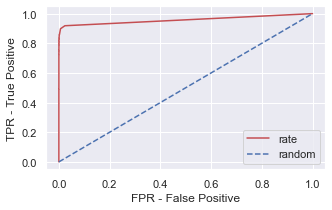

In [124]:
fpr, tpr, th = roc_curve(y_test, proba[:, 1])
print(fpr[:5],'\n', tpr[:5], '\n',th[:5])
print(len(fpr), len(tpr), len(th))

sns.set(rc={'figure.figsize':(5, 3)})
plt.figure()
plt.xlabel("FPR - False Positive")
plt.ylabel("TPR - True Positive")
plt.plot(fpr, tpr,     "r",   label='rate')
plt.plot([0,1], [0,1]  ,"b",  linestyle="--", label='random')
plt.legend()
plt.show()

In [126]:
proba = gcv_model.predict_proba(X_test[:10])
print("model.predict_proba() \n", proba)
print(  (proba[:,1]>0.5))
print(  (proba[:,1]>0.5).astype(int))

print(  (proba[:,1]>0.47).astype(int))

model.predict_proba() 
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[False False False False False False False False False False]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [130]:
# model
model = RandomForestClassifier(n_estimators=100, random_state=1234)
model.fit(X_train, y_train)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)

[0. 0. 0. 0. 0.] 
 [0.         0.1122449  0.24489796 0.29591837 0.32653061] 
 [2.   1.   0.99 0.98 0.97]
49 49 49


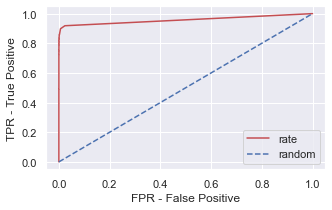

In [124]:
fpr, tpr, th = roc_curve(y_test, proba[:, 1])
print(fpr[:5],'\n', tpr[:5], '\n',th[:5])
print(len(fpr), len(tpr), len(th))

sns.set(rc={'figure.figsize':(5, 3)})
plt.figure()
plt.xlabel("FPR - False Positive")
plt.ylabel("TPR - True Positive")
plt.plot(fpr, tpr,     "r",   label='rate')
plt.plot([0,1], [0,1]  ,"b",  linestyle="--", label='random')
plt.legend()
plt.show()

In [126]:
proba = gcv_model.predict_proba(X_test[:10])
print("model.predict_proba() \n", proba)
print(  (proba[:,1]>0.5))
print(  (proba[:,1]>0.5).astype(int))

print(  (proba[:,1]>0.47).astype(int))

model.predict_proba() 
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[False False False False False False False False False False]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


		<<RandomForestClassifier>>
[[56859     5]
 [   27    71]]
------------------------------------------------------------
<DETAIL>
	 accuracy:	0.9995 
 	 precision:	0.9467 
 	 recall:	0.7245 
 	 f1:		0.8208



c:\ai\pythonproject\venv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


NameError: name 'score' is not defined

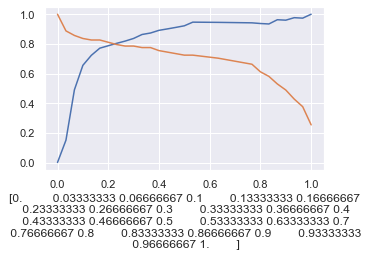

In [141]:
my_fit_score(train, 'class', binary_mode=True)